<a href="https://colab.research.google.com/github/kchitrapu9000/ML_assignment_50545734/blob/main/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-21-cd13fe2b230b>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


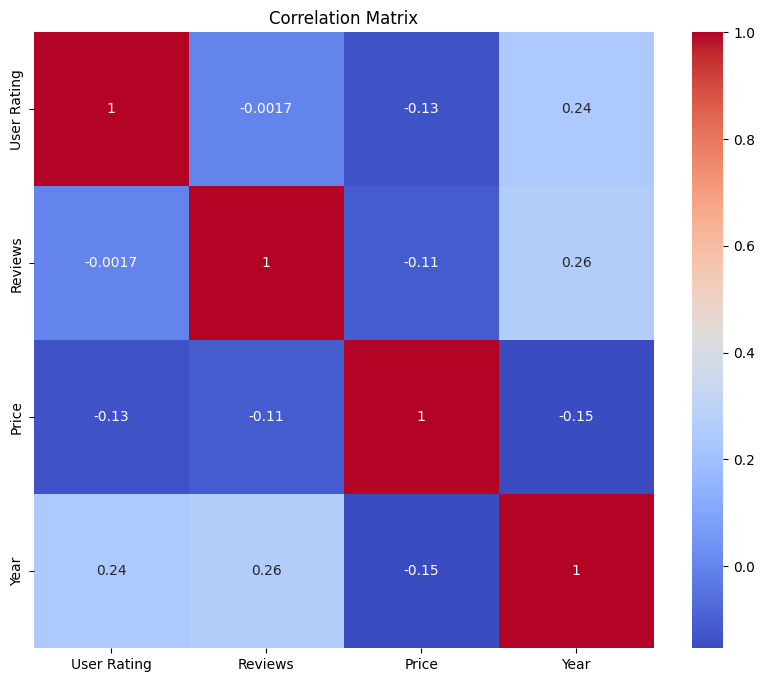

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


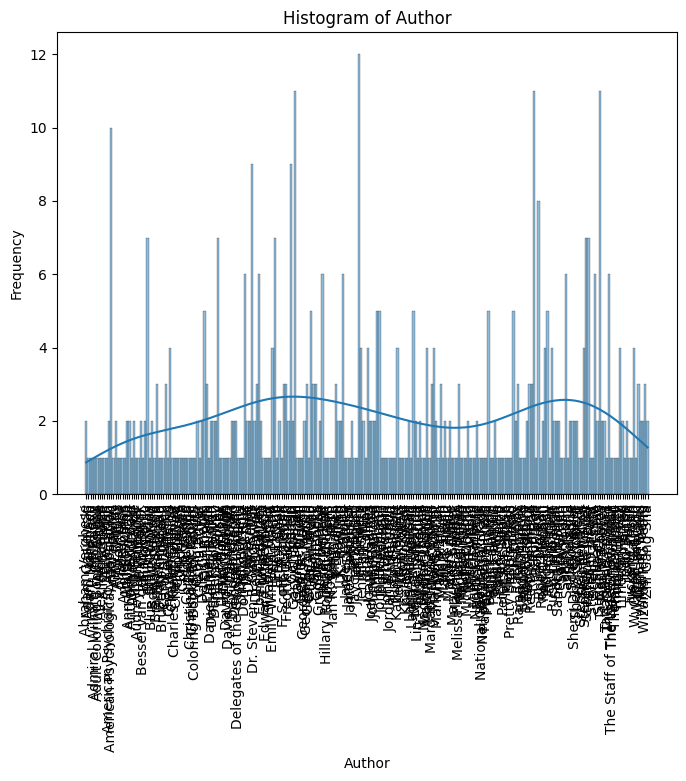

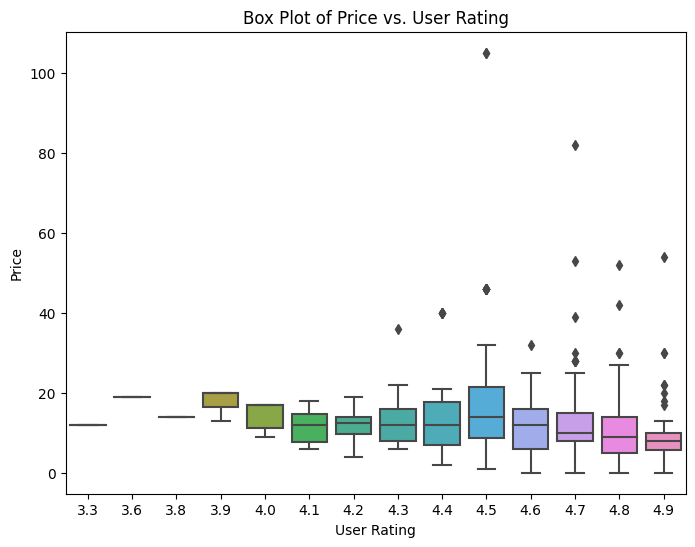

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


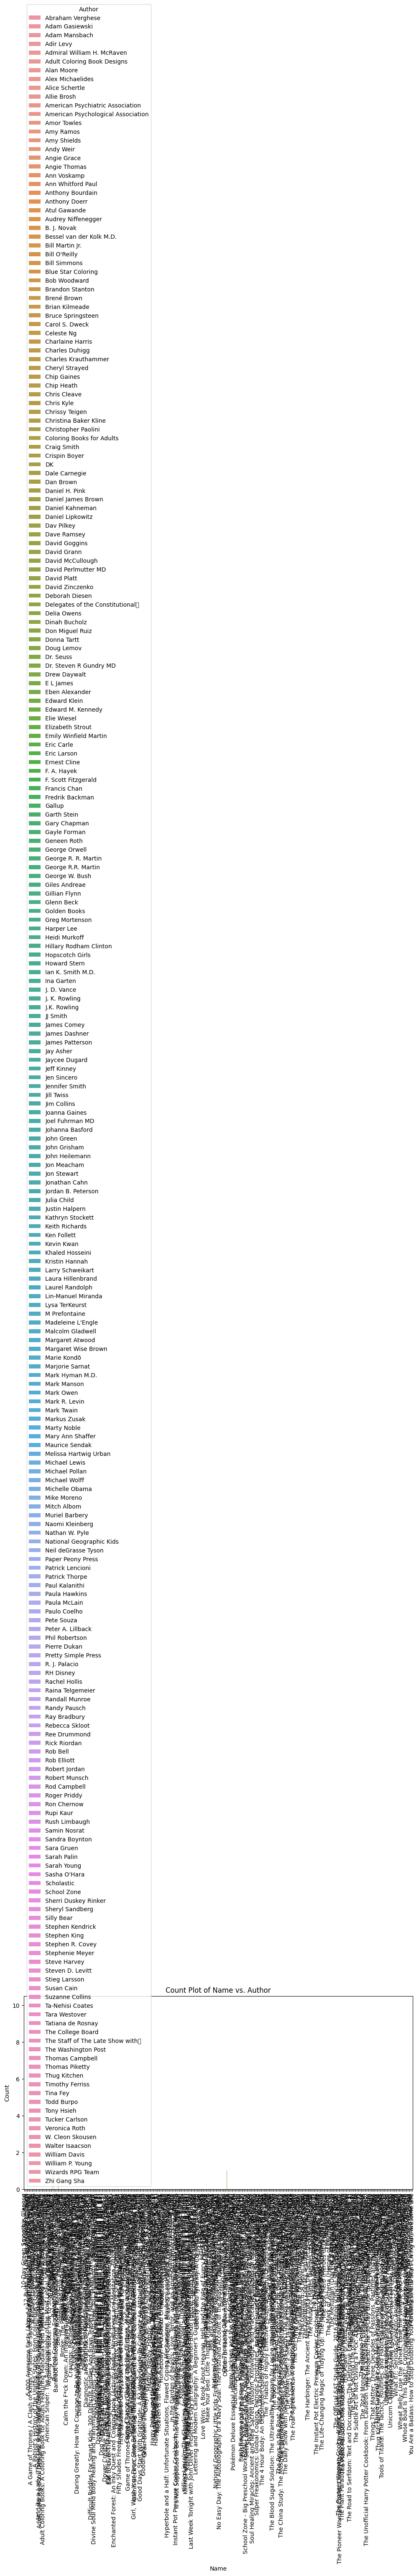

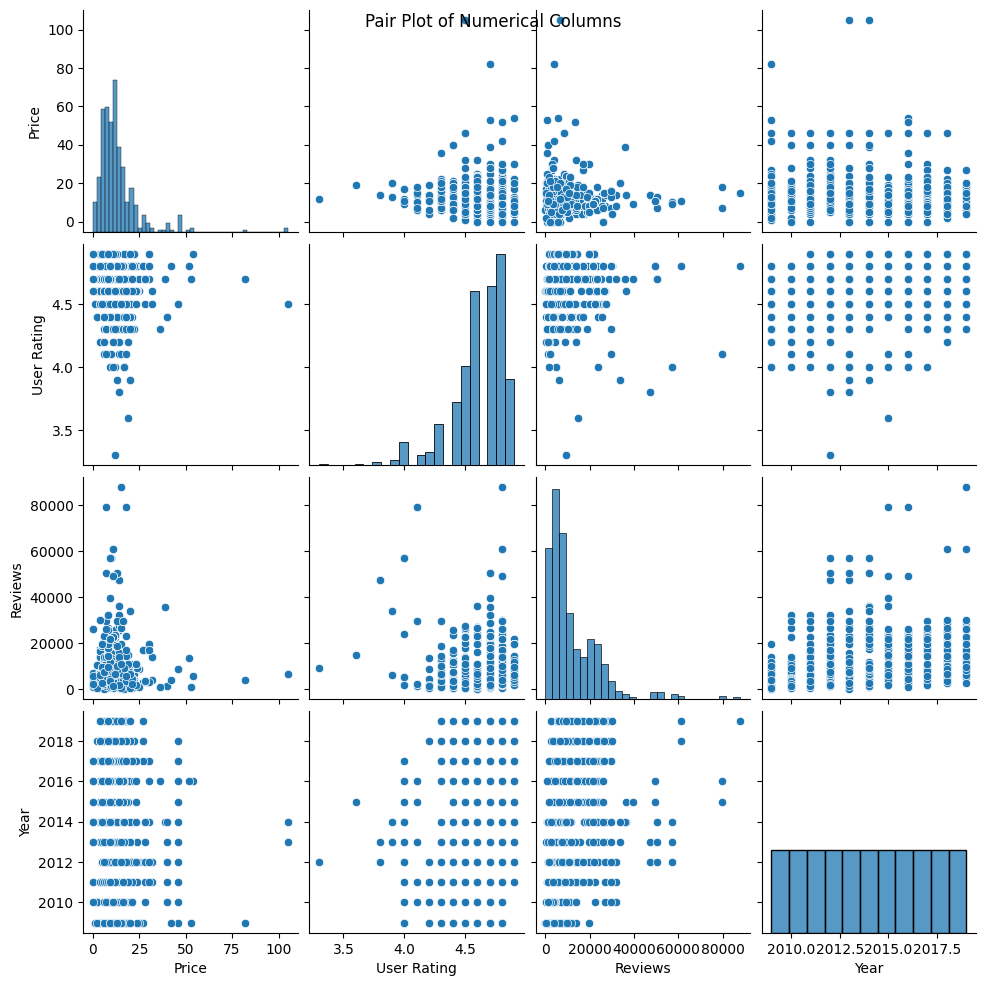

In [ ]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'


data = pd.read_csv('Amazon_top_selling_book.csv')

statistics = data.describe()

missing_values = data.isnull().sum()

data['Author'].fillna(data['Author'].mode()[0], inplace=True)

string_columns = data.select_dtypes(include=['object']).columns
data[string_columns] = data[string_columns].astype('category')

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data['Author'], kde=True)
plt.title('Histogram of Author')
plt.xlabel('Author')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['User Rating'], y=data['Price'])
plt.title('Box Plot of Price vs. User Rating')
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Name', hue='Author')
plt.title('Count Plot of Name vs. Author')
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

sns.pairplot(data=data, vars=['Price', 'User Rating', 'Reviews', 'Year'])
plt.suptitle('Pair Plot of Numerical Columns')
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


X_train shape: (1119, 11)
y_train shape: (1119,)
X_test shape: (480, 11)
y_test shape: (480,)
weights :  [ 3.31610271e+00 -1.70512569e-01 -2.23890581e-03 -5.06235030e-03
 -3.83103674e-02 -2.73680787e-02  1.84891676e-02 -2.54669232e-02
  1.20359906e-01 -1.23552308e-02  7.27728403e-02 -2.50190745e-03]
Mean Squared Error (MSE) on Testing Data: 0.0069865686722880545


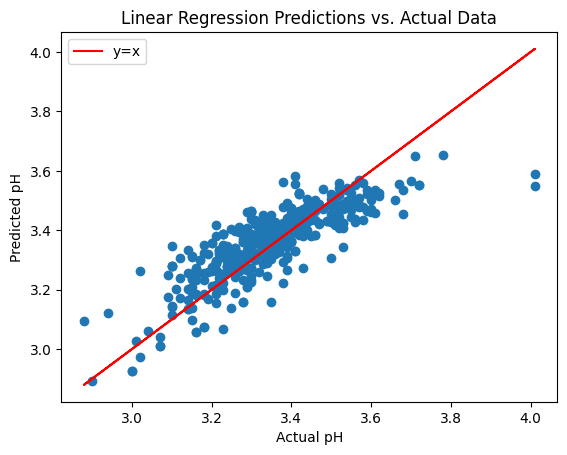

In [ ]:
#2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('winequality-red.csv')


X = data.drop(columns=['pH'])
y = data['pH']

X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std

split_ratio = 0.7
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

w = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

print("weights : ", w )

X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

y_pred = X_test_b.dot(w)

mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error (MSE) on Testing Data:", mse)

plt.scatter(y_test, y_pred, marker='o')
plt.plot(y_test, y_test, color='red', label='y=x')
plt.xlabel("Actual pH")
plt.ylabel("Predicted pH")
plt.title("Linear Regression Predictions vs. Actual Data")
plt.legend()
plt.show()

Accuracy: 0.4420289855072464
Accuracy Percentage: 44.20289855072464


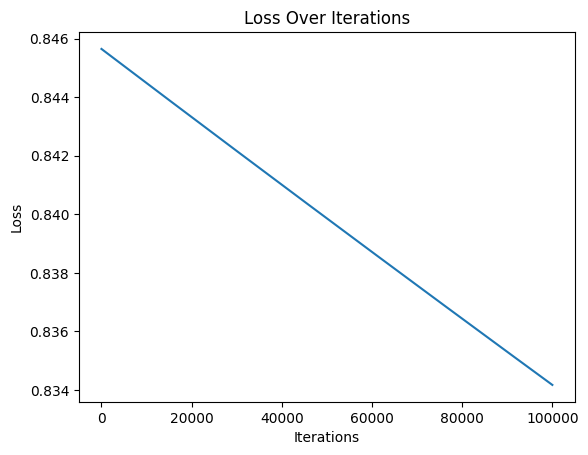

Accuracy: 0.9492753623188406
Accuracy Percentage: 94.92753623188406


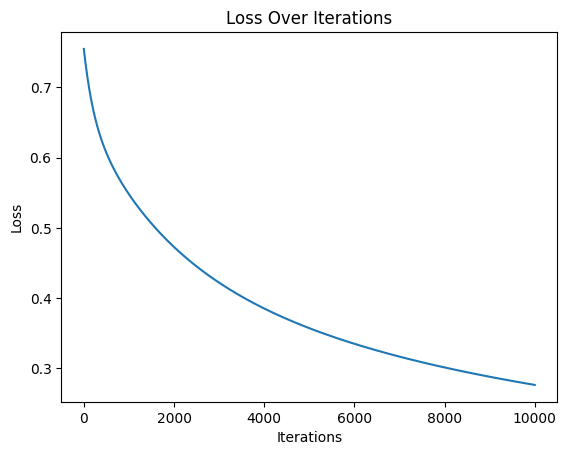

Accuracy: 0.9420289855072463
Accuracy Percentage: 94.20289855072464


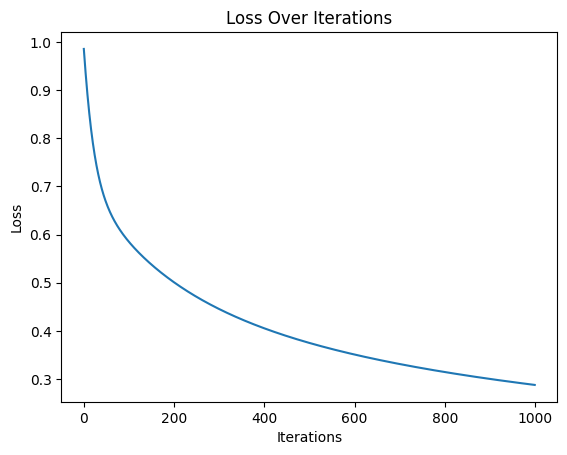

In [ ]:
#3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class LogitRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, h, y):
        m = len(y)
        return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    def gradient_descent(self, X, h, y):
        m = len(y)
        return (1 / m) * np.dot(X.T, (h - y))

    def fit(self, X, y):
        self.weights = np.random.uniform(0, 1, X.shape[1])
        self.loss = []

        for _ in range(self.iterations):
            z = np.dot(X, self.weights)
            h = self.sigmoid(z)
            gradient = self.gradient_descent(X, h, y)
            self.weights -= self.learning_rate * gradient
            cost = self.cost(h, y)
            self.loss.append(cost)

    def predict(self, X):
        z = np.dot(X, self.weights)
        predicted_probabilities = self.sigmoid(z)
        predictions = [1 if p >= 0.5 else 0 for p in predicted_probabilities]
        return predictions

data = pd.read_csv('penguins.csv')


data.fillna(data.mode().iloc[0], inplace=True)

data['island'] = data['island'].astype('category').cat.codes
data['sex'] = data['sex'].astype('category').cat.codes
data['is_Adelie'] = (data['species'] == 'Adelie')
#data['species'] = data['species'].astype('category').cat.codes

for column in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

data = data.sample(frac=1.0, random_state=42)

X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y = data['is_Adelie'].values

split_ratio = 0.6
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

different_setups ={
    1e-6:100000,
    0.01:10000,
    0.1: 1000
}

for learning_rate, iterations in different_setups.items():
  model = LogitRegression(learning_rate, iterations)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = np.mean(y_pred == y_test)
  print("Accuracy:", accuracy)
  print("Accuracy Percentage:", accuracy * 100)
  plt.plot(range(len(model.loss)), model.loss)
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.title("Loss Over Iterations")
  plt.show()


<ipython-input-14-e191ee00ba36>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


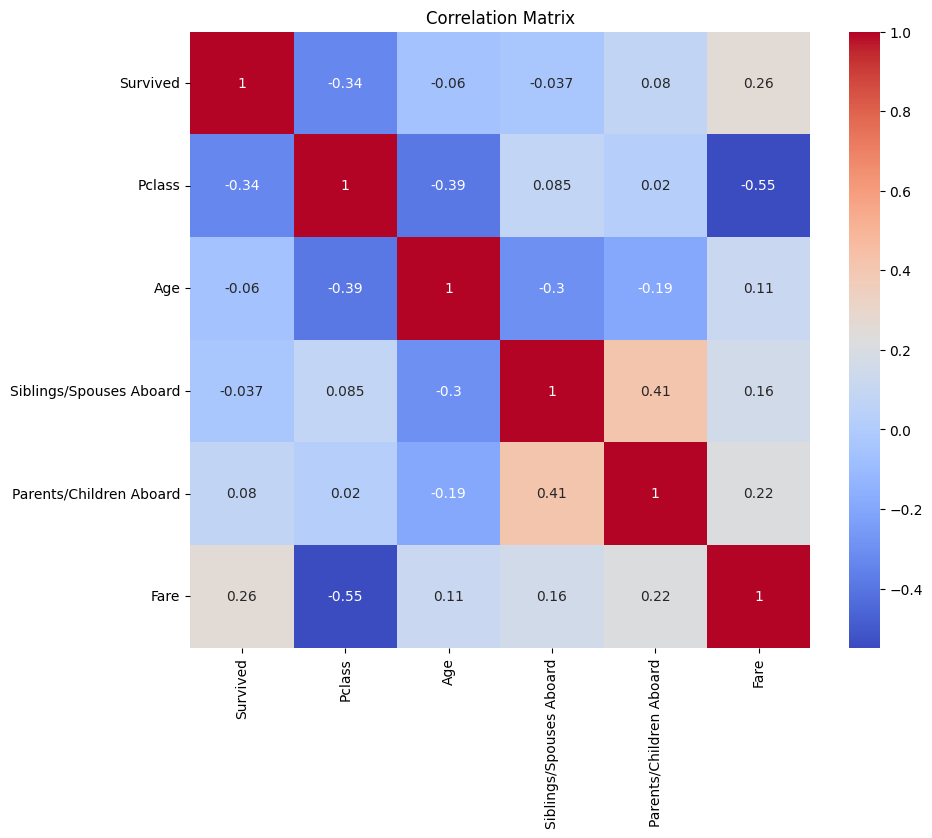

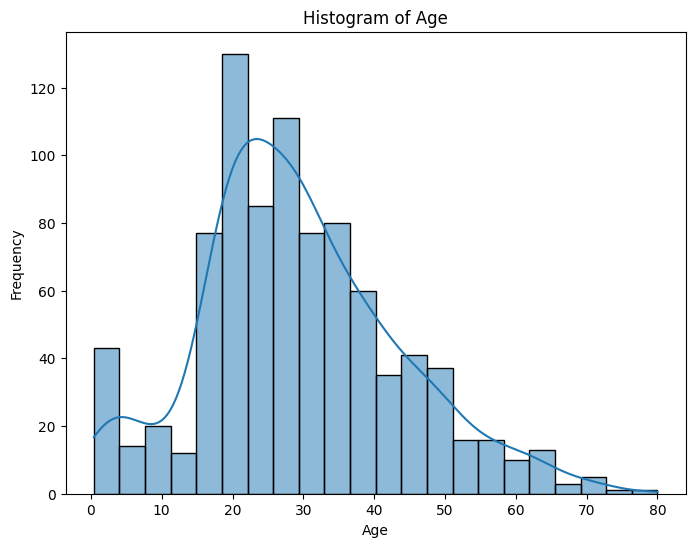

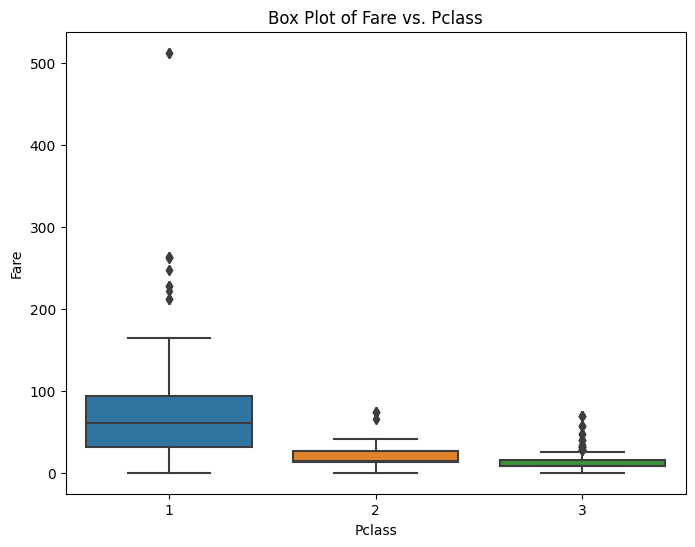

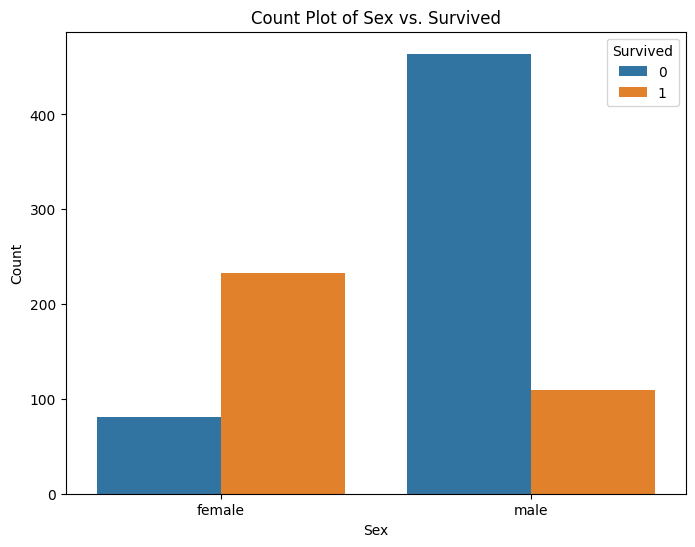

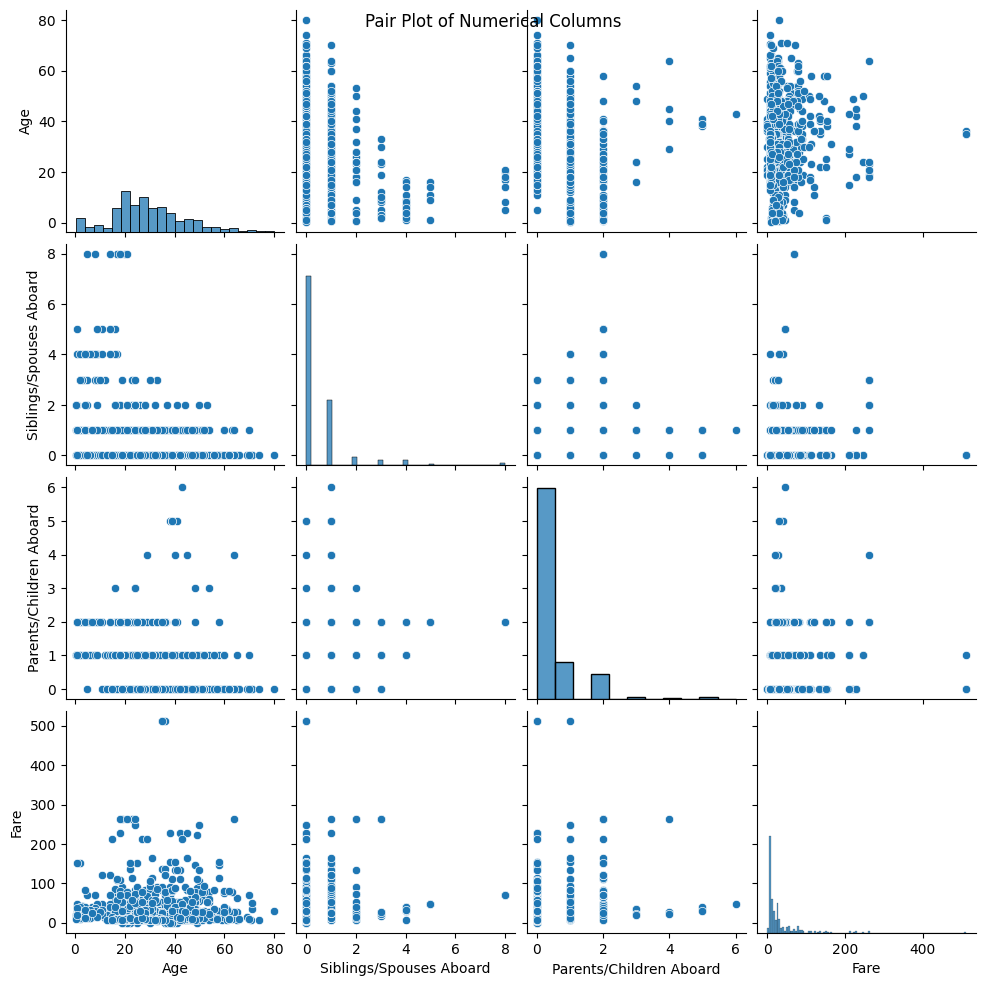

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Titanic dataset
dataset = pd.read_csv('titanic.csv')

# Calculate descriptive statistics of the dataset
statistics = dataset.describe()

# Count the number of missing values in each column
missing_values = dataset.isnull().sum(axis=0)

# Fill missing values with the mode of each column
dataset.fillna(dataset.mode().iloc[0], inplace=True)

# Convert string columns to categorical data type
string_columns = dataset.select_dtypes(include=['object']).columns
dataset[string_columns] = dataset[string_columns].astype('category')

# Calculate the correlation matrix of the dataset
correlation_matrix = dataset.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot a histogram of the 'Age' column
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Age'], kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot a box plot of 'Fare' vs. 'Pclass'
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Pclass'], y=dataset['Fare'])
plt.title('Box Plot of Fare vs. Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# Plot a count plot of 'Sex' vs. 'Survived'
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Sex', hue='Survived')
plt.title('Count Plot of Sex vs. Survived')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Plot a pair plot of numerical columns
sns.pairplot(data=dataset, vars=['Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'])
plt.suptitle('Pair Plot of Numerical Columns')
plt.show()